In [2]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.1 MB/s eta 0:00:00


In [3]:
import praw
reddit = praw.Reddit(client_id='enter your client id', client_secret='--', user_agent='--')

In [51]:
import pandas as pd
posts = []
ml_subreddit = reddit.subreddit('Bitcoin')
for post in ml_subreddit.hot(limit=10000):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,title,score,id,subreddit,url,num_comments,body,created
0,Bitcoin Newcomers FAQ - Please read!,118,16bm9de,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/16bm...,77,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,1.694012e+09
1,"Daily Discussion, December 01, 2023",7,1884rrd,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/1884...,11,Please utilize this sticky thread for all gene...,1.701411e+09
2,Me during the bull run,727,187rb87,Bitcoin,https://i.redd.it/l47g4clohj3c1.jpg,70,,1.701374e+09
3,Could you guys stop mining for a minute? Tryin...,369,187rp9l,Bitcoin,https://i.redd.it/yxns6kow8j3c1.jpg,34,,1.701375e+09
4,Lawrence Lepard: Bitcoin is the most asymmetri...,227,187tj25,Bitcoin,https://v.redd.it/0fvezavxxj3c1,27,,1.701379e+09
...,...,...,...,...,...,...,...,...
807,Portfolio app that allows public address import?,6,17zkad1,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17zk...,2,Does any application exist where I can add my ...,1.700471e+09
808,What’s the absolute most secure hardware cold ...,21,17z9uvp,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17z9...,102,I’m talking about the kind of wallet that with...,1.700435e+09
809,Sent coin to a friend today.,0,17zwpdm,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17zw...,27,From my mycelium hot wallet to his address and...,1.700509e+09
810,Current Hashrate - 659.5 EH/s,145,17ywg2o,Bitcoin,https://i.redd.it/v6j01r90wa1c1.png,27,,1.700398e+09


In [50]:
posts.to_csv('sample_reddit.csv')

In [7]:
import re

def clean_data(data):
    return ' '.join(re.sub('([^A-Za-z])', ' ', data).split())

In [8]:
def remove_https(item):
    item_1 = re.sub(r"[(+*)]\S*https?:\S*[(+*)]", "", item)
    item_2 = re.sub('http://\S+|https://\S+', " ", item_1)
    item_3 = re.sub(r"[\(\[].*?[\)\]]", " ", item_2)
    return item_3

In [9]:
posts['Cleaned_Body'] = posts['body'].apply(lambda x : clean_data(x))
posts['Cleaned_Body'] = posts['Cleaned_Body'].apply(lambda x : remove_https(x))

In [10]:
posts['Cleaned_Body'] = posts.Cleaned_Body.astype("str")
posts['Cleaned_Body']= [item.lower() for item in posts.Cleaned_Body]
posts['Cleaned_Body'] = [re.sub(r"(\B'\b)|(\b'\B)", ' ', item) for item in posts.Cleaned_Body]
posts['Cleaned_Body'] = [re.sub(r'…', ' ', item) for item in posts.Cleaned_Body]
posts['Cleaned_Body'] = [item.replace('\\',' ') for item in posts.Cleaned_Body]
posts['Cleaned_Body'] = [item.replace('/',' ') for item in posts.Cleaned_Body]

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [13]:
def analyze_sentiment(data):
    analysis = SIA().polarity_scores(data)
    return analysis['compound']

In [14]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [15]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = "positive"
    elif sentiment_polarity < 0:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"
    #store result in a dictionary
    result = {"polarity": sentiment_polarity,
             "subjectivity": sentiment_subjectivity,
             "sentiment": sentiment_label}
    return result

In [16]:
posts['Sentiment_Score'] = posts['Cleaned_Body'].apply(lambda x : analyze_sentiment(x))

In [17]:
posts['Sentiment_Analysis'] = posts.Cleaned_Body.apply(get_sentiment)

In [18]:
sentiment = pd.json_normalize(posts['Sentiment_Analysis'])

In [19]:
posts = posts.drop(columns='Sentiment_Analysis')

In [38]:
posts = pd.concat([posts,sentiment], axis = 1)
posts.head()

,title,score,id,subreddit,url,num_comments,body,created,polarity,subjectivity,sentiment,polarity,subjectivity,sentiment,polarity,subjectivity,sentiment
0,Bitcoin Newcomers FAQ - Please read!,120,16bm9de,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/16bm...,77,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,1.694012e+09,0.121737,0.432459,positive,0.121737,0.432459,positive,0.121737,0.432459,positive
1,"Daily Discussion, December 01, 2023",5,1884rrd,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/1884...,10,Please utilize this sticky thread for all gene...,1.701411e+09,0.059957,0.345887,positive,0.059957,0.345887,positive,0.059957,0.345887,positive
2,Me during the bull run,714,187rb87,Bitcoin,https://i.redd.it/l47g4clohj3c1.jpg,70,,1.701374e+09,0.000000,0.000000,neutral,0.000000,0.000000,neutral,0.000000,0.000000,neutral
3,Could you guys stop mining for a minute? Tryin...,362,187rp9l,Bitcoin,https://i.redd.it/yxns6kow8j3c1.jpg,34,,1.701375e+09,0.000000,0.000000,neutral,0.000000,0.000000,neutral,0.000000,0.000000,neutral
4,Lawrence Lepard: Bitcoin is the most asymmetri...,215,187tj25,Bitcoin,https://v.redd.it/0fvezavxxj3c1,27,,1.701379e+09,0.000000,0.000000,neutral,0.000000,0.000000,neutral,0.000000,0.000000,neutral


In [44]:
posts = posts.T.drop_duplicates().T
posts

,title,score,id,subreddit,url,num_comments,body,created,polarity,subjectivity,sentiment
0,Bitcoin Newcomers FAQ - Please read!,120,16bm9de,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/16bm...,77,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,1694011779.0,0.121737,0.432459,positive
1,"Daily Discussion, December 01, 2023",5,1884rrd,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/1884...,10,Please utilize this sticky thread for all gene...,1701410918.0,0.059957,0.345887,positive
2,Me during the bull run,714,187rb87,Bitcoin,https://i.redd.it/l47g4clohj3c1.jpg,70,,1701373753.0,0.0,0.0,neutral
3,Could you guys stop mining for a minute? Tryin...,362,187rp9l,Bitcoin,https://i.redd.it/yxns6kow8j3c1.jpg,34,,1701374730.0,0.0,0.0,neutral
4,Lawrence Lepard: Bitcoin is the most asymmetri...,215,187tj25,Bitcoin,https://v.redd.it/0fvezavxxj3c1,27,,1701379288.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...
807,Portfolio app that allows public address import?,6,17zkad1,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17zk...,2,Does any application exist where I can add my ...,1700470676.0,0.123295,0.33125,positive
808,What’s the absolute most secure hardware cold ...,22,17z9uvp,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17z9...,102,I’m talking about the kind of wallet that with...,1700435415.0,0.466667,0.9,positive
809,Sent coin to a friend today.,0,17zwpdm,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17zw...,27,From my mycelium hot wallet to his address and...,1700508634.0,-0.07381,0.657143,negative
810,Current Hashrate - 659.5 EH/s,148,17ywg2o,Bitcoin,https://i.redd.it/v6j01r90wa1c1.png,27,,1700397926.0,0.0,0.0,neutral


In [46]:
posts['SentimentScore']= posts['polarity'] + posts['subjectivity']
posts

,title,score,id,subreddit,url,num_comments,body,created,polarity,subjectivity,sentiment,SentimentScore
0,Bitcoin Newcomers FAQ - Please read!,120,16bm9de,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/16bm...,77,# Welcome to the /r/Bitcoin Newcomers FAQ\n\nY...,1694011779.0,0.121737,0.432459,positive,0.554197
1,"Daily Discussion, December 01, 2023",5,1884rrd,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/1884...,10,Please utilize this sticky thread for all gene...,1701410918.0,0.059957,0.345887,positive,0.405844
2,Me during the bull run,714,187rb87,Bitcoin,https://i.redd.it/l47g4clohj3c1.jpg,70,,1701373753.0,0.0,0.0,neutral,0.0
3,Could you guys stop mining for a minute? Tryin...,362,187rp9l,Bitcoin,https://i.redd.it/yxns6kow8j3c1.jpg,34,,1701374730.0,0.0,0.0,neutral,0.0
4,Lawrence Lepard: Bitcoin is the most asymmetri...,215,187tj25,Bitcoin,https://v.redd.it/0fvezavxxj3c1,27,,1701379288.0,0.0,0.0,neutral,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
807,Portfolio app that allows public address import?,6,17zkad1,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17zk...,2,Does any application exist where I can add my ...,1700470676.0,0.123295,0.33125,positive,0.454545
808,What’s the absolute most secure hardware cold ...,22,17z9uvp,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17z9...,102,I’m talking about the kind of wallet that with...,1700435415.0,0.466667,0.9,positive,1.366667
809,Sent coin to a friend today.,0,17zwpdm,Bitcoin,https://www.reddit.com/r/Bitcoin/comments/17zw...,27,From my mycelium hot wallet to his address and...,1700508634.0,-0.07381,0.657143,negative,0.583333
810,Current Hashrate - 659.5 EH/s,148,17ywg2o,Bitcoin,https://i.redd.it/v6j01r90wa1c1.png,27,,1700397926.0,0.0,0.0,neutral,0.0


In [47]:
len(posts)

812

[*********************100%%**********************]  1 of 1 completed


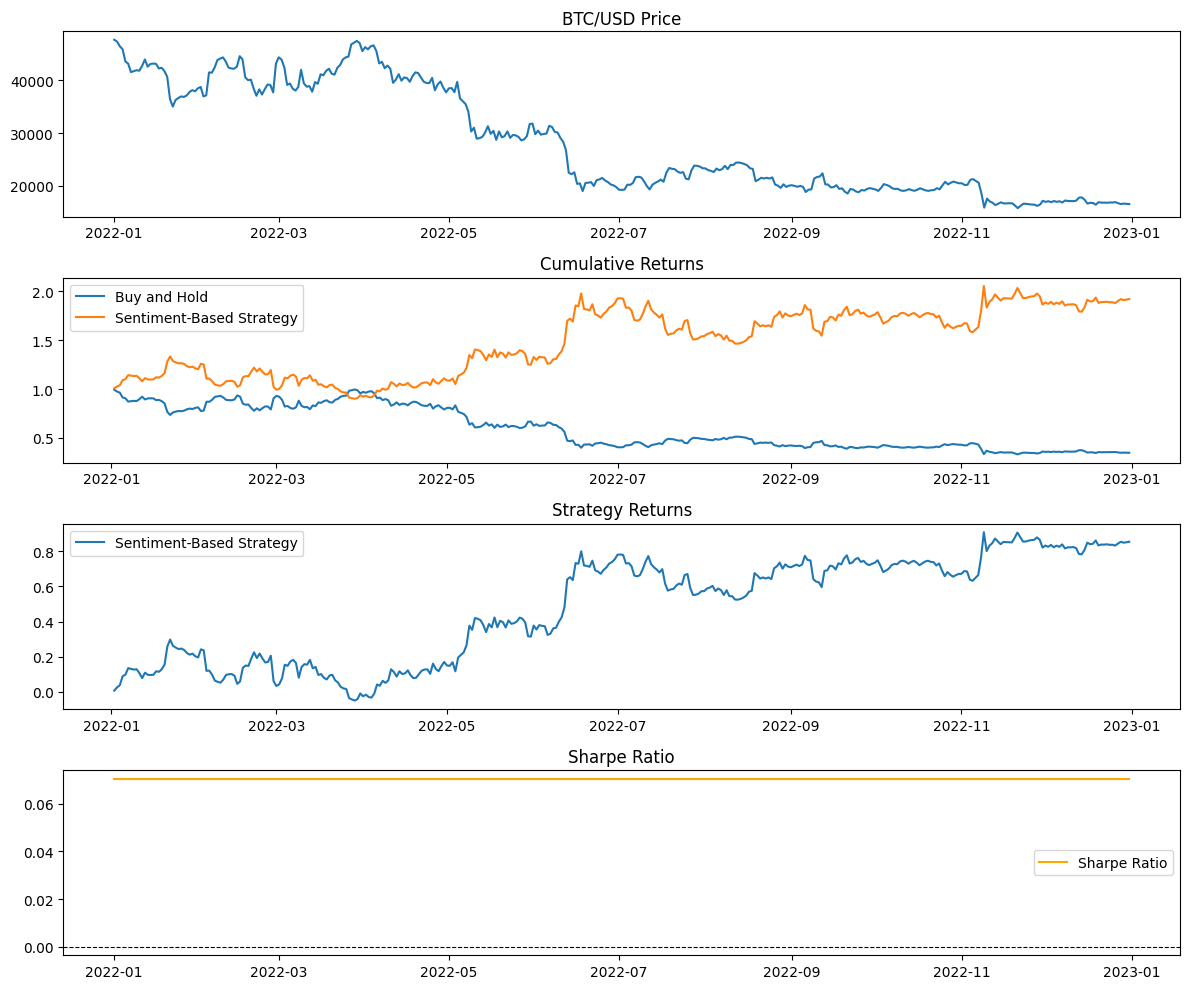

Sharpe Ratio: 0.0705


In [52]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

posts = pd.DataFrame(index=data.index)
posts['SentimentScore'] = 0
posts['Position'] = 0
posts['Position'][posts['SentimentScore'] > 0.6] = 1
posts['Position'][posts['SentimentScore'] <= 0.6] = -1

symbol = "BTC-USD"
start_date = "2022-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date, interval="1d")
merged_data = pd.merge(data, posts, left_index=True, right_index=True, how='left')

merged_data['DailyReturns'] = merged_data['Close'].pct_change()
merged_data['StrategyReturns'] = merged_data['Position'] * merged_data['DailyReturns']
merged_data['CumulativeReturns'] = (1 + merged_data['DailyReturns']).cumprod()
merged_data['CumulativeStrategyReturns'] = (1 + merged_data['StrategyReturns']).cumprod()
average_strategy_return = merged_data['StrategyReturns'].mean()
std_dev_strategy_return = merged_data['StrategyReturns'].std()
sharpe_ratio = average_strategy_return / std_dev_strategy_return

plt.figure(figsize=(12, 10))
plt.subplot(4, 1, 1)
plt.plot(merged_data['Close'], label='BTC/USD')
plt.title('BTC/USD Price')

plt.subplot(4, 1, 2)
plt.plot(merged_data['CumulativeReturns'], label='Buy and Hold')
plt.plot(merged_data['CumulativeStrategyReturns'], label='Sentiment-Based Strategy')
plt.legend()
plt.title('Cumulative Returns')

plt.subplot(4, 1, 3)
plt.plot(merged_data['StrategyReturns'].cumsum(), label='Sentiment-Based Strategy')
plt.legend()
plt.title('Strategy Returns')

plt.subplot(4, 1, 4)
sharpe_ratio_series = pd.Series(index=merged_data.index, data=sharpe_ratio)
plt.plot(sharpe_ratio_series, label='Sharpe Ratio', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.title('Sharpe Ratio')
plt.tight_layout()
plt.show()

print(f'Sharpe Ratio: {sharpe_ratio:.4f}')
